In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
superstore = pd.read_csv('SampleSuperstore.csv')
superstore

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
superstore.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Product which yields more profit and which doesnot.

In [7]:
sns.set_style(style='darkgrid')

<AxesSubplot:title={'center':'Profit of Each Sub-Category'}, xlabel='Profit', ylabel='Sub-Category'>

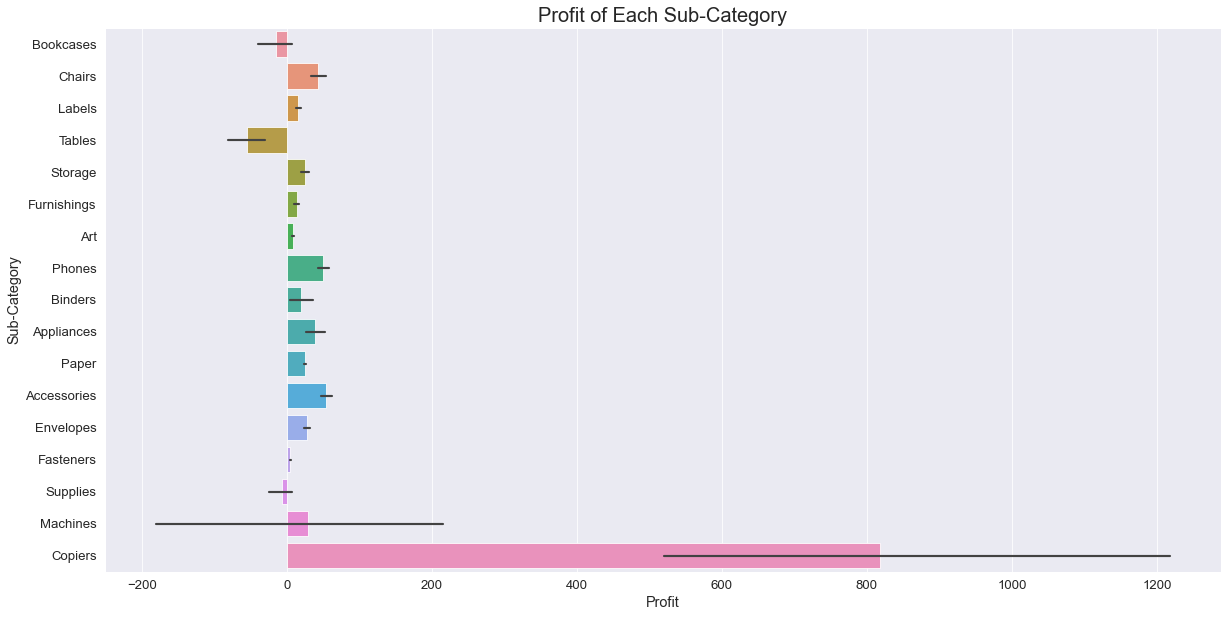

In [12]:
plt.figure(figsize=(20,10))
plt.title('Profit of Each Sub-Category', fontdict={'size':20})
sns.set_context(font_scale=1.5)
sns.barplot(x=superstore['Profit'], y=superstore['Sub-Category'])

Products like Bookcases, Tables, Supplies face loss instead of Profit.

Let's look at the relationship between the sales and profit for each category.

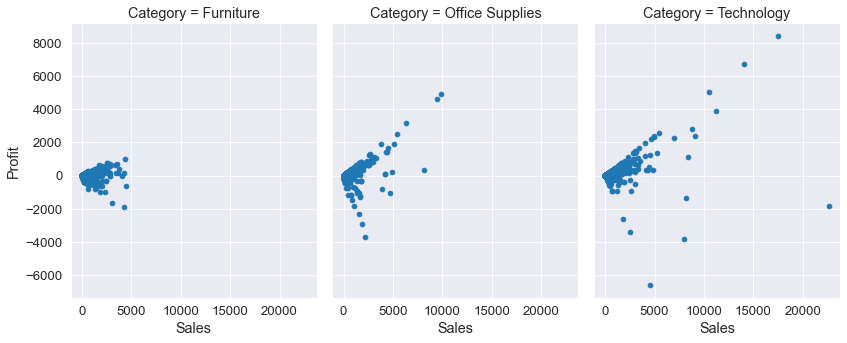

In [13]:
g = sns.FacetGrid(superstore, col = "Category", height=5, aspect=0.8)
g.map(plt.scatter, 'Sales', 'Profit')
plt.show()

Region wise sum of sales:

Text(0.5, 1.0, 'Region wise Sales')

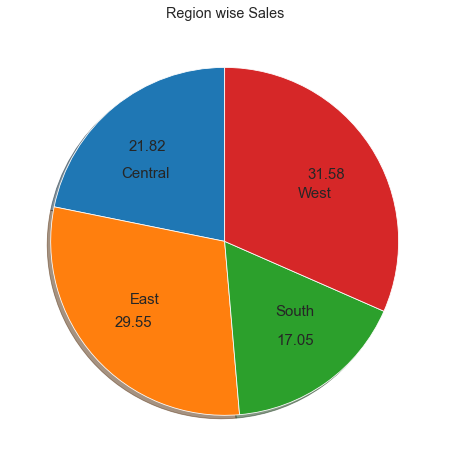

In [14]:
region_sales = superstore[['Region','Sales']]
region_sales = region_sales.groupby('Region').sum()
plt.figure(figsize=(10,8))
plt.pie(region_sales['Sales'], autopct="%.2f", pctdistance=0.7, 
        labels=region_sales.index, labeldistance=0.5, shadow=True, 
        startangle=90, textprops={'size':15})
plt.title('Region wise Sales')

Highest and lowest selled product:

In [15]:
sale = superstore[['Sub-Category','Sales']]
print(sale[sale.Sales == sale.Sales.max()])
print(sale[sale.Sales == sale.Sales.min()])

     Sub-Category     Sales
2697     Machines  22638.48
     Sub-Category  Sales
4101   Appliances  0.444


Highest and lowest profit:

In [16]:
profit = superstore[['Sub-Category','Profit']]
print(profit[profit.Profit == profit.Profit.max()])
print(profit[profit.Profit == profit.Profit.min()])

     Sub-Category    Profit
6826      Copiers  8399.976
     Sub-Category    Profit
7772     Machines -6599.978


Top & Bottom 10 sales & profit and their State:

In [17]:
top_sales = superstore[['State','Sales']]
top_sales = top_sales.sort_values(by='Sales', ascending=False)
sale_top = top_sales.head(10)
sale_bottom = top_sales.tail(10)

top_profit = superstore[['State','Profit']]
top_profit = top_profit.sort_values(by='Profit', ascending=False)
profit_top = top_profit.head(10)
profit_bottom = top_profit.tail(10)

Text(0.5, 1.0, 'Top 10 Sales')

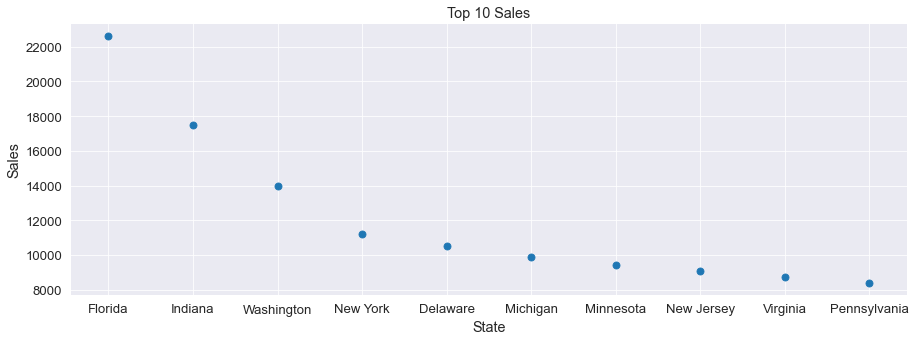

In [18]:
plt.figure(figsize=(15,5))
plt.scatter('State', 'Sales', data=sale_top, s=50)
plt.xlabel('State')
plt.ylabel('Sales')
plt.title('Top 10 Sales')

Text(0.5, 1.0, 'Bottom 10 Sales')

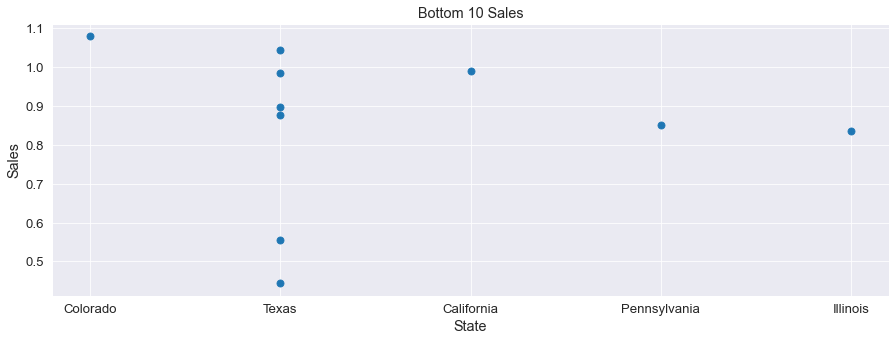

In [19]:
plt.figure(figsize=(15,5))
plt.scatter('State', 'Sales', data=sale_bottom, s=50)
plt.xlabel('State')
plt.ylabel('Sales')
plt.title('Bottom 10 Sales')

Text(0.5, 1.0, 'Top & Bottom Profit')

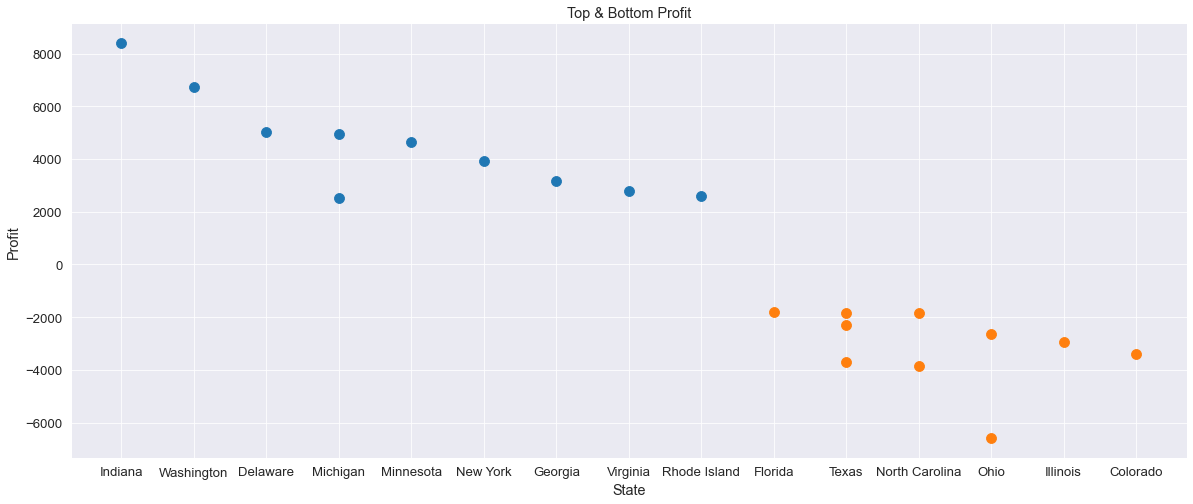

In [20]:
plt.figure(figsize=(20,8))
plt.scatter('State', 'Profit', data=profit_top, s=100)
plt.scatter('State', 'Profit', data=profit_bottom, s=100)
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Top & Bottom Profit')

<AxesSubplot:title={'center':'Categories sold per Region'}, xlabel='Region', ylabel='count'>

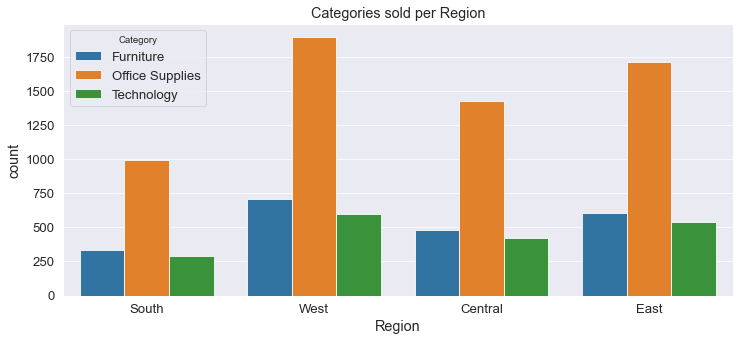

In [21]:
plt.figure(figsize=(12,5))
plt.title('Categories sold per Region')
sns.countplot(x=superstore['Region'], hue=superstore['Category'])

State wise sales per Category:

<AxesSubplot:xlabel='Sales', ylabel='State'>

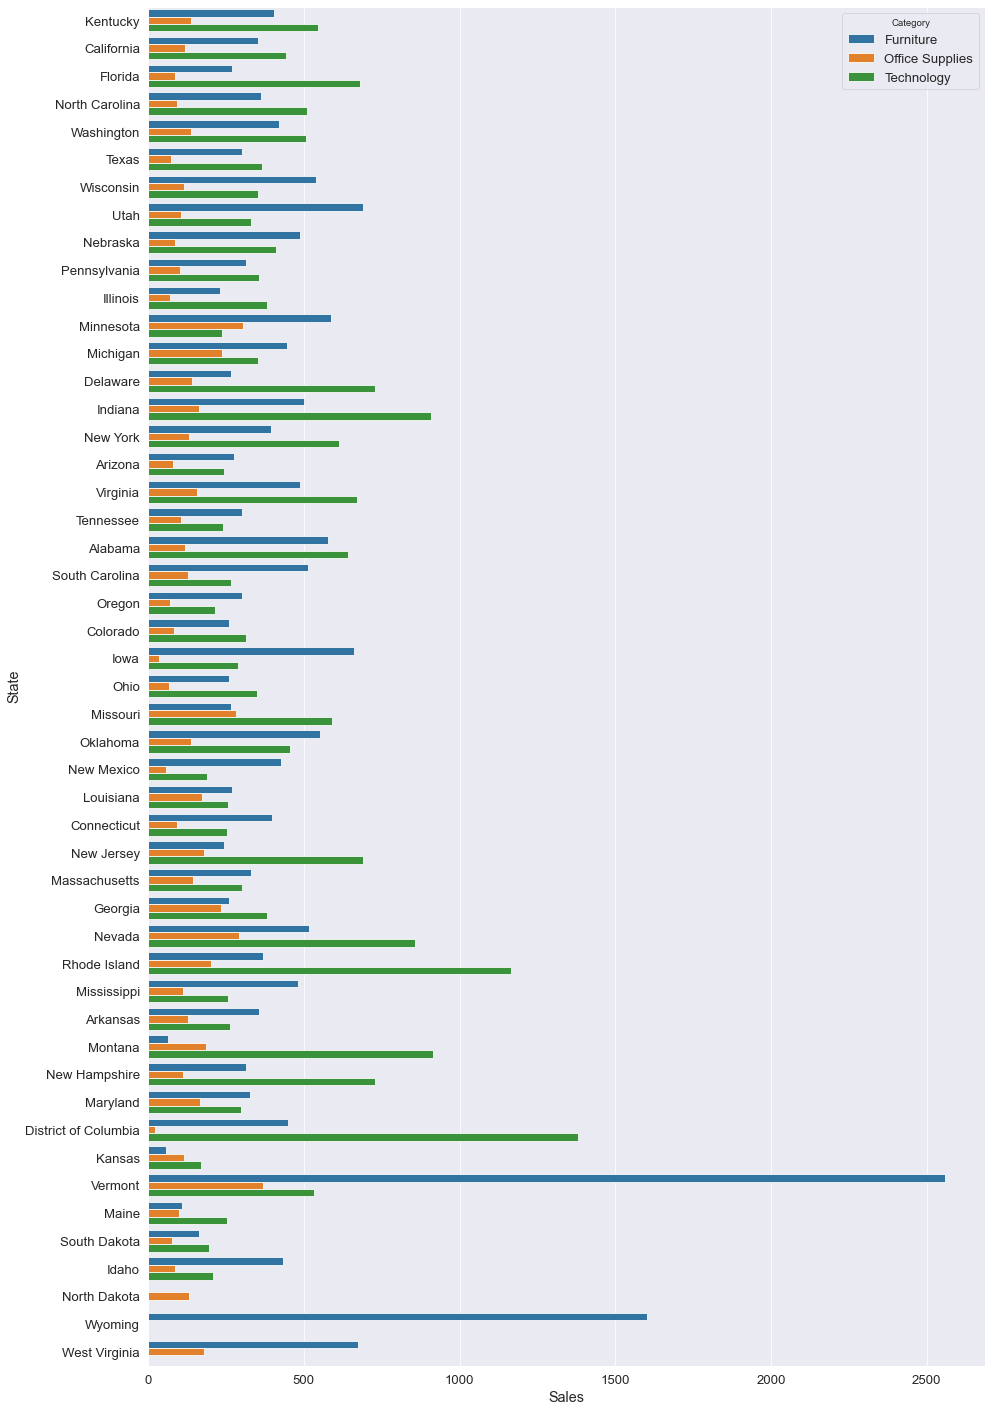

In [22]:
plt.figure(figsize=(15,25))
sns.barplot(x='Sales', y='State', data=superstore, hue='Category', ci=None)